# Uno sguardo sull'andamento dell'istruzione femminile in Europa
L'European Institute for Gender Equality ha pubblicato un database contenente degli indicatori utili per quantificare la parità di genere in Europa: il Gender Statistics Database. 
In questa esercitazione esploreremo un dataset appartenente a questo database. L'indicatore prescelto è il "At least upper secondary educational attainment, age group 25-64 by sex" (https://eige.europa.eu/gender-statistics/dgs/indicator/ta_eductrain_educ__tps00065/datatable?age=Y25-64&isced11=ED3-8&unit=PC&col=time&row=geo&colg=sex). Questo indicatore rappresenta la percentuale di popolazione con un'età compresa tra il 25 e i 64 anni che ha conseguito un diploma di istruzione compreso tra i livelli internazionali di 3 e 8. 
La Classificazione internazionale standard dell'istruzione raggrupopa i corsi di studio nei seguenti livelli: 

|Livello|Descrizione|Caratteristiche principali|
|-----|----|----|
|0|Istruzione prescolastica (01 asilo nido)|Istruzione mirata a sostenere lo sviluppo iniziale in preparazione alla partecipazione nella scuola e nella società. Per bambini al di sotto dei 3 anni|
|0|Istruzione prescolastica (02 scuola dell'infanzia)|Istruzione mirata a sostenere lo sviluppo iniziale in preparazione alla partecipazione nella scuola e nella società. Per bambini dai 3 anni all'inizio dell'istruzione primaria|
|1|Istruzione primaria|Programmi tipicamente mirati a fornire agli studenti le competenze fondamentali in lettura, scrittura e matematica, e a stabilire una solida base di apprendimento generale|
|2|Istruzione secondaria inferiore|Primo stadio di istruzione secondaria, che si basa sull'istruzione primaria, tipicamente con un curriculum più orientato alle materie.
|3|Istruzione secondaria superiore|Secondo/ultimo stadio di istruzione secondaria che prepara all'istruzione terziaria e/o fornisce competenze utili all'inserimento nel mercato del lavoro. Solitamente con una vasta gamma di materie tra cui scegliere.|
|4|Istruzione post-secondaria non-terziaria|Programmi che forniscono esperienze di apprendimento che si basano sull'istruzione secondaria e preparano al mercato del lavoro. Il contenuto è più esteso rispetto alla secondaria ma non così complesso quanto l'istruzione terziaria.|
|5|Istruzione terziaria a ciclo breve|Primi programmi terziari brevi tipicamente pratici, specifici all'occupazione e preparativi per l'ingresso nel mercato del lavoro. Questi programmi possono anche fornire un ingresso ad altri programmi terziari.|
|6|Istruzione superiore: Bachelor o equivalenti (Laurea triennale)|Programmi mirati a fornire conoscenze, qualifiche e competenze professionali e/o accademiche di livello intermedio, che portano a una prima laurea terziaria a un certificato equivalente.|
|7|Istruzione superiore: Master o equivalenti (Laurea magistrale)|Programmi mirati a fornire conoscenze, qualifiche e competenze professionali e/o accademiche di livello avanzato, che portano a una seconda laurea terziaria o a un certificato equivalente.|
|8|Istruzione superiore: Dottorale o equivalenti (Dottorato)|Programmi mirati principalmente al conseguimento di un certificato di ricerca avanzato, solitamente conclusi con la consegna e la difesa di una dissertazione considerevole basata su ricerche originali, di qualità tale da essere pubblicabile|

I livelli di istruzione dal 3 e l'8 comprendono quindi l'istruzione che va dal diplome di istruzione superiore al dottorato. 



## Carico i dati

In [109]:
#creo l'ambiente 
#conda create --name esercitazione
#conda activate esercitazione

In [106]:
#installazione delle librerie (se necessario)
#conda install numpy
#conda install pandas
#conda install geopandas
#conda install matplotlib
#conda install highlight_text

In [2]:
#import delle librerie
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.patches as patches
from  highlight_text import fig_text

In [130]:
#leggiamo il dataset 
df = pd.read_csv('H://Archivio//CSI//ADABI//20251125//esercitazione//esercitazione_def.CSV', sep=";")  

In [208]:
#dati per mappe
#importo shapefile per mappa
#https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip
world = gpd.read_file(
    "H://Archivio//CSI//ADABI//20251125//esercitazione//ne_110m_admin_0_countries//ne_110m_admin_0_countries.shp")

# filtro per europa e turchia
europe = world.query("CONTINENT=='Europe' or NAME =='Turkey' or NAME=='Cyprus' or NAME=='Malta' " )

## Data exploration

In [7]:
df.head()

,country,gender,key,2013_up_sec_edu_perc,2014_up_sec_edu_perc,2015_up_sec_edu_perc,2016_up_sec_edu_perc,2017_up_sec_edu_perc,2018_up_sec_edu_perc,2019_up_sec_edu_perc,...,2015_up_sec_edu_tot,2016_up_sec_edu_tot,2017_up_sec_edu_tot,2018_up_sec_edu_tot,2019_up_sec_edu_tot,2020_up_sec_edu_tot,2021_up_sec_edu_tot,2022_up_sec_edu_tot,2023_up_sec_edu_tot,2024_up_sec_edu_tot
0,Austria,Females,Austria_Females,0.79,0.80,0.81,0.81,0.82,0.82,0.83,...,1926075.0,1949652.0,1989602.0,2008203.0,2038806.0,2058686.0,2077768,2085886,2112761,2141989
1,Austria,Males,Austria_Males,0.87,0.88,0.89,0.88,0.88,0.89,0.88,...,2109497.0,2131097.0,2155724.0,2182395.0,2189185.0,2197408.0,2210624,2216376,2239331,2232681
2,Austria,Total,Austria_Total,0.83,0.84,0.85,0.85,0.85,0.85,0.86,...,4031146.0,4080628.0,4145124.0,4190312.0,4230144.0,4258220.0,4285471,4299187,4351702,4374352
3,Belgium,Females,Belgium_Females,0.74,0.75,0.76,0.76,0.78,0.79,0.80,...,2255446.0,2267881.0,2328660.0,2377138.0,2417403.0,2456840.0,2498888,2527429,2547063,2572854
4,Belgium,Males,Belgium_Males,0.72,0.72,0.74,0.74,0.76,0.77,0.77,...,2205133.0,2238504.0,2290319.0,2341463.0,2342598.0,2384220.0,2452460,2490698,2495436,2522376


In [9]:
df.columns

Index(['country', 'gender', 'key', '2013_up_sec_edu_perc',
       '2014_up_sec_edu_perc', '2015_up_sec_edu_perc', '2016_up_sec_edu_perc',
       '2017_up_sec_edu_perc', '2018_up_sec_edu_perc', '2019_up_sec_edu_perc',
       '2020_up_sec_edu_perc', '2021_up_sec_edu_perc', '2022_up_sec_edu_perc',
       '2023_up_sec_edu_perc', '2024_up_sec_edu_perc', '2013_pop', '2014_pop',
       '2015_pop', '2016_pop', '2017_pop', '2018_pop', '2019_pop', '2020_pop',
       '2021_pop', '2022_pop', '2023_pop', '2024_pop', '2013_up_sec_edu_tot',
       '2014_up_sec_edu_tot', '2015_up_sec_edu_tot', '2016_up_sec_edu_tot',
       '2017_up_sec_edu_tot', '2018_up_sec_edu_tot', '2019_up_sec_edu_tot',
       '2020_up_sec_edu_tot', '2021_up_sec_edu_tot', '2022_up_sec_edu_tot',
       '2023_up_sec_edu_tot', '2024_up_sec_edu_tot'],
      dtype='object')

In [25]:
#quali nazioni sono presenti?
print(df.sort_values(by='country')['country'].unique())

['Austria' 'Belgium' 'BosniaandHerzegovina' 'Bulgaria' 'Croatia' 'Cyprus'
 'Czechia' 'Denmark' 'Estonia' 'Euroarea(20countries)'
 'EuropeanUnion-27countries(from2020)' 'Finland' 'France' 'Germany'
 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Italy' 'Latvia' 'Lithuania'
 'Luxembourg' 'Malta' 'Montenegro' 'Netherlands' 'NorthMacedonia' 'Norway'
 'Poland' 'Portugal' 'Romania' 'Serbia' 'Slovakia' 'Slovenia' 'Spain'
 'Sweden' 'Switzerland' 'Turkiye' 'UnitedKingdom']


In [156]:
print(europe.sort_values(by='NAME')['NAME'].unique())

['Albania' 'Austria' 'Belarus' 'Belgium' 'Bosnia and Herz.' 'Bulgaria'
 'Croatia' 'Cyprus' 'Czechia' 'Denmark' 'Estonia' 'Finland' 'France'
 'Germany' 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Italy' 'Kosovo'
 'Latvia' 'Lithuania' 'Luxembourg' 'Moldova' 'Montenegro' 'Netherlands'
 'North Macedonia' 'Norway' 'Poland' 'Portugal' 'Romania' 'Russia'
 'Serbia' 'Slovakia' 'Slovenia' 'Spain' 'Sweden' 'Switzerland' 'Turkey'
 'Ukraine' 'United Kingdom']


## Data Cleaning

In [26]:
#alcune nazioni necessitano di pulizia sui nomi
df['country'] = df['country'].replace('BosniaandHerzegovina','Bosnia and Herz.')
df['country'] = df['country'].replace('NorthMacedonia','North Macedonia')
df['country'] = df['country'].replace('Turkiye','Turkey')
df['country'] = df['country'].replace('UnitedKingdom','United Kingdom')

## Data Preparation
Creo delle colonne che serviranno in seguito per l'analisi. Preparo i dataset divisi per donne e uomini

In [136]:
#differenza tra 2013 e 2023
df['var_1323'] = df['2023_up_sec_edu_perc'] - df['2013_up_sec_edu_perc']
df[['country', 'gender', '2013_up_sec_edu_perc', '2023_up_sec_edu_perc', 'var_1323']]

,country,gender,2013_up_sec_edu_perc,2023_up_sec_edu_perc,var_1323
0,Austria,Females,0.79,0.84,0.05
1,Austria,Males,0.87,0.88,0.01
2,Austria,Total,0.83,0.86,0.03
3,Belgium,Females,0.74,0.83,0.09
4,Belgium,Males,0.72,0.81,0.09
...,...,...,...,...,...
109,Turkiye,Males,0.38,0.51,0.13
110,Turkiye,Total,0.32,0.46,0.14
111,UnitedKingdom,Females,0.77,NaN,NaN
112,UnitedKingdom,Males,0.80,NaN,NaN


In [137]:
#creo dataset per uomini e donne
df_f = df[df['gender']=="Females"]
df_m = df[df['gender']=="Males"]

## Analisi
Di seguito sono riportati alcuni esempi di analisi dati.

### Quali sono i paesi europei con una percentuale più alta di istruzione secondaria femminile nel 2013?

In [29]:
#seleziono le colonne di interesse e tolgo i null
df_f_13 = df_f[["country", "2013_up_sec_edu_perc"]].dropna()

#creo un ranking basato sulla percentuale di donne con un livello di istruzione maggiore o uguale a 3
df_f_13['ordine'] = df_f_13['2013_up_sec_edu_perc'].rank(method= 'dense', ascending=False)

df_f_13.set_index('ordine',  inplace=True, drop=True)

df_f_13.sort_values(by='2013_up_sec_edu_perc', ascending=False)

,country,2013_up_sec_edu_perc
ordine,,
1.0,Lithuania,0.95
2.0,Latvia,0.93
2.0,Estonia,0.93
3.0,Czechia,0.91
4.0,Poland,0.90
4.0,Slovakia,0.90
5.0,Finland,0.88
6.0,Slovenia,0.85
6.0,Germany,0.85


### Quali sono i paesi europei con una percentuale più alta di istruzione secondaria femminile nel 2023?

In [30]:
#seleziono le colonne di interesse e tolgo i null
df_f_23 = df_f[["country", "2023_up_sec_edu_perc"]].dropna()

#creo un ranking basato sulla percentuale di donne con un livello di istruzione maggiore o uguale a 3
df_f_23['ordine'] = df_f_23['2023_up_sec_edu_perc'].rank(method= 'dense', ascending=False)

df_f_23.set_index('ordine',  inplace=True, drop=True)

df_f_23.sort_values(by='2023_up_sec_edu_perc', ascending=False)

,country,2023_up_sec_edu_perc
ordine,,
1.0,Lithuania,0.96
2.0,Poland,0.95
3.0,Czechia,0.94
3.0,Latvia,0.94
4.0,Slovakia,0.93
4.0,Estonia,0.93
5.0,Finland,0.92
6.0,Ireland,0.91
7.0,Sweden,0.90


### Qual è la posizione rispetto alla media europea dei paesi nel 2023? 

In [119]:
#calcolo la media europea
media_eu_f23_df = df_f_23[df_f_23['country']=="EuropeanUnion-27countries(from2020)"]
media_eu_f23 = media_eu_f23_df['2023_up_sec_edu_perc'].values.item()
media_eu_f23

0.81

In [126]:
df_f_23['flag_media_eu'] = np.where(df_f_23['2023_up_sec_edu_perc']>=media_eu_f23, 1, 0)
df_f_23.sort_values(by='2023_up_sec_edu_perc', ascending=False)

,country,2023_up_sec_edu_perc,flag_media_eu
ordine,,,
1.0,Lithuania,0.96,1
2.0,Poland,0.95,1
3.0,Czechia,0.94,1
3.0,Latvia,0.94,1
4.0,Slovakia,0.93,1
4.0,Estonia,0.93,1
5.0,Finland,0.92,1
6.0,Ireland,0.91,1
7.0,Sweden,0.90,1


### Rappresentazione su mappa dell'istruzione femminile e maschile, nel 2013 e nel 2023

In [127]:
#creo i dataset da rappresentare 
#istruzione femminile
data_f_13 = europe.merge(df_f_13, how='left',
                         left_on='NAME', right_on='country')

data_f_23 = europe.merge(df_f_23, how='left',
                         left_on='NAME', right_on='country')

#istruzione maschile 2013
df_m_13 = df_m[["country", "2013_up_sec_edu_perc"]].dropna()

#creo un ranking basato sulla percentuale di uomini con un livello di istruzione maggiore o uguale a 3
df_m_13['ordine'] = df_m_13['2013_up_sec_edu_perc'].rank(method= 'dense', ascending=False)

df_m_13.set_index('ordine',  inplace=True, drop=True)

data_m_13 = europe.merge(df_m_13, how='left',
                         left_on='NAME', right_on='country')

#istruzione maschile 2023
df_m_23 = df_m[["country", "2023_up_sec_edu_perc"]].dropna()

#creo un ranking basato sulla percentuale di uomini con un livello di istruzione maggiore o uguale a 3
df_m_23['ordine'] = df_m_23['2023_up_sec_edu_perc'].rank(method= 'dense', ascending=False)

df_m_23.set_index('ordine',  inplace=True, drop=True)

data_m_13 = europe.merge(df_m_13, how='left',
                         left_on='NAME', right_on='country')

data_m_23 = europe.merge(df_m_23, how='left',
                         left_on='NAME', right_on='country')



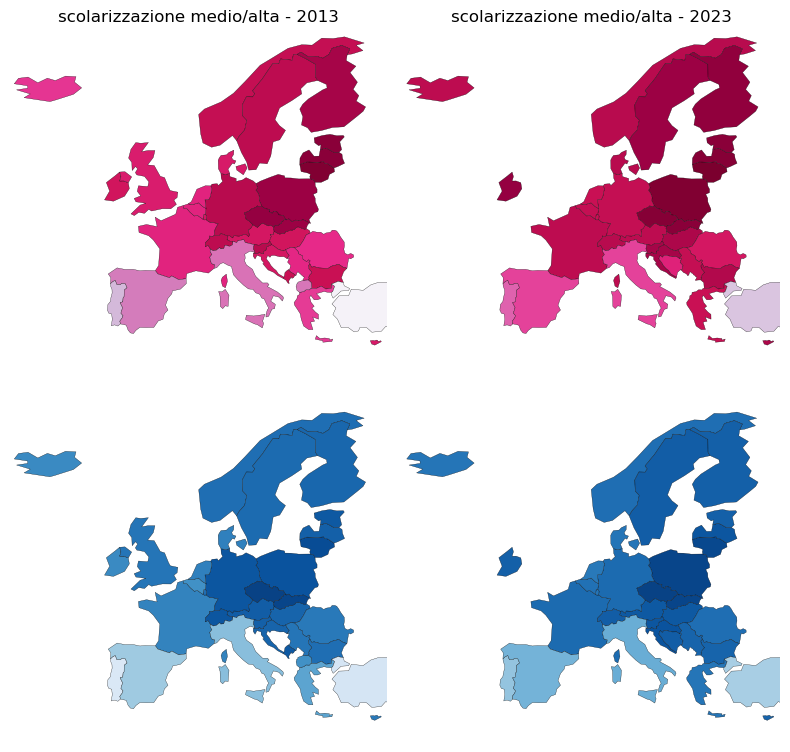

In [95]:
# sistemo il layout
fig, ax = plt.subplots(2, 2, figsize=(8, 8))

# definisco i colori
#femmine
cmap_f = cm.PuRd
#maschi
cmap_m = cm.Blues
min_rate, max_rate = 0.25, 1
norm = mcolors.Normalize(vmin=min_rate, vmax=max_rate)

# creao i grafici
data_f_13.plot(column='2013_up_sec_edu_perc', cmap=cmap_f, norm=norm, ax=ax[0,0], edgecolor='black', linewidth=0.2)
data_f_23.plot(column='2023_up_sec_edu_perc', cmap=cmap_f, norm=norm, ax=ax[0,1], edgecolor='black', linewidth=0.2)

data_m_13.plot(column='2013_up_sec_edu_perc', cmap=cmap_m, norm=norm, ax=ax[1,0], edgecolor='black', linewidth=0.2)
data_m_23.plot(column='2023_up_sec_edu_perc', cmap=cmap_m, norm=norm, ax=ax[1,1], edgecolor='black', linewidth=0.2)

# custom axis
ax[0,0].set_xlim(-25, 35)
ax[0,0].set_ylim(32, 72)
ax[0,0].axis('off')
ax[0,0].set_title('scolarizzazione medio/alta - 2013')

ax[0,1].set_xlim(-25, 35)
ax[0,1].set_ylim(32, 72)
ax[0,1].axis('off')
ax[0,1].set_title('scolarizzazione medio/alta - 2023')


ax[1,0].set_xlim(-25, 35)
ax[1,0].set_ylim(32, 72)
ax[1,0].axis('off')
#ax[1,0].set_title('% di uomini con grado di istrzione medio/alto - 2013')

ax[1,1].set_xlim(-25, 35)
ax[1,1].set_ylim(32, 72)
ax[1,1].axis('off')


# display the plot
plt.tight_layout()
plt.show()


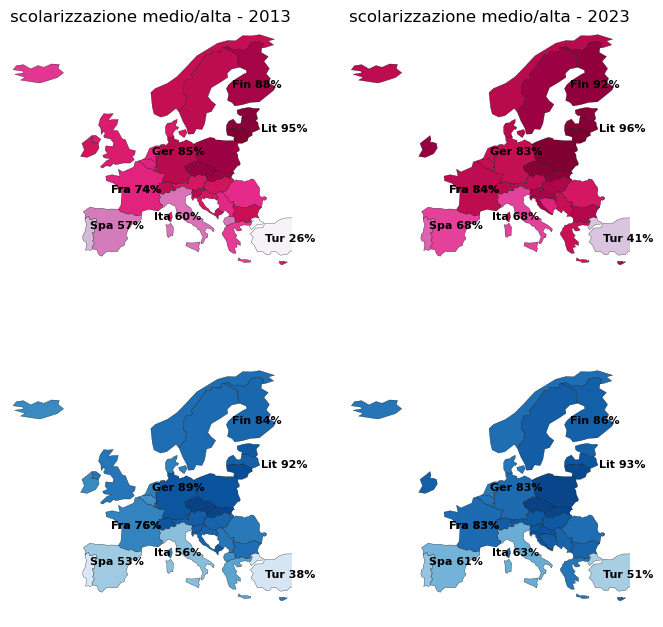

In [99]:
# sistemo il layout
fig, ax = plt.subplots(2, 2, figsize=(8, 8))

# definisco i colori
#femmine
cmap_f = cm.PuRd
#maschi
cmap_m = cm.Blues
min_rate, max_rate = 0.25, 1
norm = mcolors.Normalize(vmin=min_rate, vmax=max_rate)

# creao i grafici
data_f_13.plot(column='2013_up_sec_edu_perc', cmap=cmap_f, norm=norm, ax=ax[0,0], edgecolor='black', linewidth=0.2)
data_f_23.plot(column='2023_up_sec_edu_perc', cmap=cmap_f, norm=norm, ax=ax[0,1], edgecolor='black', linewidth=0.2)

data_m_13.plot(column='2013_up_sec_edu_perc', cmap=cmap_m, norm=norm, ax=ax[1,0], edgecolor='black', linewidth=0.2)
data_m_23.plot(column='2023_up_sec_edu_perc', cmap=cmap_m, norm=norm, ax=ax[1,1], edgecolor='black', linewidth=0.2)

# custom axis
ax[0,0].set_xlim(-25, 35)
ax[0,0].set_ylim(32, 72)
ax[0,0].axis('off')
ax[0,0].set_title('scolarizzazione medio/alta - 2013')

ax[0,1].set_xlim(-25, 35)
ax[0,1].set_ylim(32, 72)
ax[0,1].axis('off')
ax[0,1].set_title('scolarizzazione medio/alta - 2023')


ax[1,0].set_xlim(-25, 35)
ax[1,0].set_ylim(32, 72)
ax[1,0].axis('off')
#ax[1,0].set_title('% di uomini con grado di istrzione medio/alto - 2013')

ax[1,1].set_xlim(-25, 35)
ax[1,1].set_ylim(32, 72)
ax[1,1].axis('off')


#aggiungiamo delle altre informazioni
countries_to_annotate = ['France', 'Italy', 'Turkey', 'France',
                         'Lithuania', 'Finland',
                         'Spain', 'Germany']
# centroidi 2013 - femmine
data_projected_f13 = data_f_13.to_crs(epsg=3035)
data_projected_f13['centroid'] = data_projected_f13.geometry.centroid
data_f_13['centroid'] = data_projected_f13['centroid'].to_crs(data_f_13.crs)


adjustments = {
    'France': (9, 3),
    'Italy': (-3, -2),
    'Lithuania': (8, -0.6),
    'Finland': (0, -2.5),
    'Turkey': (-2, -2),
    'Spain': (0, -1),
    'Germany': (-1, 0),
    'France': (8, 2)
}
# annotazioni 2013 - femmine
for country in countries_to_annotate:

    # get centroid
    centroid = data_f_13.loc[data_f_13['NAME'] == country, 'centroid'].values[0]
    x, y = centroid.coords[0]

    # get corrections
    x += adjustments[country][0]
    y += adjustments[country][1]

    # get rate and annotate
    rate = int(data_f_13.loc[data_f_13['NAME'] == country, '2013_up_sec_edu_perc'].values[0]*100)
    ax[0,0].annotate(f'{country[:3]} {rate}%', (x, y), textcoords="offset points", xytext=(5, 5),
                ha='center', fontsize=8, fontfamily='DejaVu Sans', weight='bold', color='black')



#centroidi 2023 - femmine
data_projected_f23 = data_f_23.to_crs(epsg=3035)
data_projected_f23['centroid'] = data_projected_f23.geometry.centroid
data_f_23['centroid'] = data_projected_f23['centroid'].to_crs(data_f_23.crs)


# annotazioni 2023 - femmine
for country in countries_to_annotate:

    # get centroid
    centroid = data_f_23.loc[data_f_23['NAME'] == country, 'centroid'].values[0]
    x, y = centroid.coords[0]

    # get corrections
    x += adjustments[country][0]
    y += adjustments[country][1]

    # get rate and annotate
    rate = int(data_f_23.loc[data_f_23['NAME'] == country, '2023_up_sec_edu_perc'].values[0]*100)
    ax[0,1].annotate(f'{country[:3]} {rate}%', (x, y), textcoords="offset points", xytext=(5, 5),
                ha='center', fontsize=8, fontfamily='DejaVu Sans', weight='bold', color='black')


# centroidi 2013 - maschi
data_projected_m13 = data_m_13.to_crs(epsg=3035)
data_projected_m13['centroid'] = data_projected_m13.geometry.centroid
data_m_13['centroid'] = data_projected_m13['centroid'].to_crs(data_m_13.crs)



# annotazioni 2013 - maschi
for country in countries_to_annotate:

    # get centroid
    centroid = data_m_13.loc[data_m_13['NAME'] == country, 'centroid'].values[0]
    x, y = centroid.coords[0]

    # get corrections
    x += adjustments[country][0]
    y += adjustments[country][1]

    # get rate and annotate
    rate = int(data_m_13.loc[data_m_13['NAME'] == country, '2013_up_sec_edu_perc'].values[0]*100)
    ax[1,0].annotate(f'{country[:3]} {rate}%', (x, y), textcoords="offset points", xytext=(5, 5),
                ha='center', fontsize=8, fontfamily='DejaVu Sans', weight='bold', color='black')


# centroidi 2023 - maschi
data_projected_m23 = data_m_23.to_crs(epsg=3035)
data_projected_m23['centroid'] = data_projected_m23.geometry.centroid
data_m_23['centroid'] = data_projected_m23['centroid'].to_crs(data_m_23.crs)


# annotazioni 2023 - maschi
for country in countries_to_annotate:

    # get centroid
    centroid = data_m_23.loc[data_m_23['NAME'] == country, 'centroid'].values[0]
    x, y = centroid.coords[0]

    # get corrections
    x += adjustments[country][0]
    y += adjustments[country][1]

    # get rate and annotate
    rate = int(data_m_23.loc[data_m_23['NAME'] == country, '2023_up_sec_edu_perc'].values[0]*100)
    ax[1,1].annotate(f'{country[:3]} {rate}%', (x, y), textcoords="offset points", xytext=(5, 5),
                ha='center', fontsize=8, fontfamily='DejaVu Sans', weight='bold', color='black')

### Rappresentiamo anche la situazione rispetto alla media europea nel 2013

Text(0.5, 1.0, 'in rosso i paesi con una scolarizzazione femminile sotto la media europea (2023)')

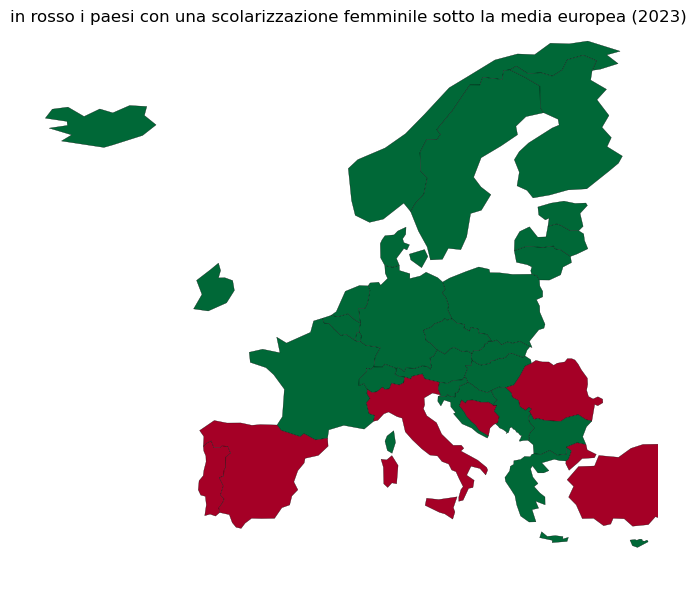

In [129]:
# sistemo il layout
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# definisco i colori
cmap_f = cm.RdYlGn
min_rate, max_rate = 0, 1
norm = mcolors.Normalize(vmin=min_rate, vmax=max_rate)

# creao i grafici
data_f_23.plot(column='flag_media_eu', cmap=cmap_f, norm=norm, ax=ax, edgecolor='black', linewidth=0.2)


# custom axis
ax.set_xlim(-25, 35)
ax.set_ylim(32, 72)
ax.axis('off')
ax.set_title('in rosso i paesi con una scolarizzazione femminile sotto la media europea (2023)')

### Come è variata l'istruzione femminile rispetto al 2013?

In [143]:
df_f_1323 = df_f[["country", "var_1323"]].dropna()
df_f_1323.sort_values(by='var_1323', ascending=False)

,country,var_1323
66,Malta,0.31
84,Portugal,0.19
108,Turkiye,0.15
48,Iceland,0.14
42,Greece,0.13
51,Ireland,0.11
99,Spain,0.10
90,Serbia,0.10
36,France,0.10
12,Croatia,0.09


Text(0.5, 1.0, "aumento dell'istruzione femminile dal 2013 al 2023")

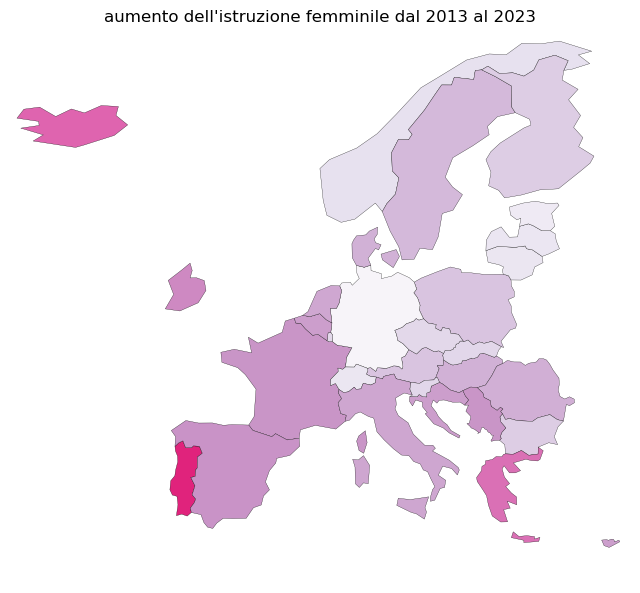

In [178]:
data_f_1323 = europe.merge(df_f_1323, how='left',
                         left_on='NAME', right_on='country')

# sistemo il layout
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# definisco i colori
cmap_f = cm.PuRd
min_rate, max_rate = -0.02, 0.3
norm = mcolors.Normalize(vmin=min_rate, vmax=max_rate)

# creao i grafici
data_f_1323.plot(column='var_1323', cmap=cmap_f, norm=norm, ax=ax, edgecolor='black', linewidth=0.2)


# custom axis
ax.set_xlim(-25, 35)
ax.set_ylim(32, 72)
ax.axis('off')
ax.set_title('aumento dell\'istruzione femminile dal 2013 al 2023')

### Quale nazione ha la maggior differenza tra istruzione femminile e maschile?

In [206]:
df_f_m_23 = df_f_23.rename(columns={'2023_up_sec_edu_perc': '2023_up_sec_edu_perc_f'})
df_f_m_23 = df_f_m_23.merge(df_m_23, how='left',
                         left_on='country', right_on='country')

df_f_m_23['differenza'] = df_f_m_23['2023_up_sec_edu_perc_f'] -  df_f_m_23['2023_up_sec_edu_perc']
df_f_m_23.sort_values(by='differenza', ascending=True)

,country,2023_up_sec_edu_perc_f,flag_media_eu,2023_up_sec_edu_perc,differenza
2,Bosnia and Herz.,0.75,0,0.87,-0.12
34,Turkey,0.41,0,0.51,-0.10
0,Austria,0.84,1,0.88,-0.04
27,Romania,0.79,0,0.82,-0.03
4,Croatia,0.88,1,0.90,-0.02
33,Switzerland,0.85,1,0.87,-0.02
28,Serbia,0.83,1,0.85,-0.02
30,Slovenia,0.88,1,0.89,-0.01
15,Hungary,0.87,1,0.88,-0.01
6,Czechia,0.94,1,0.95,-0.01


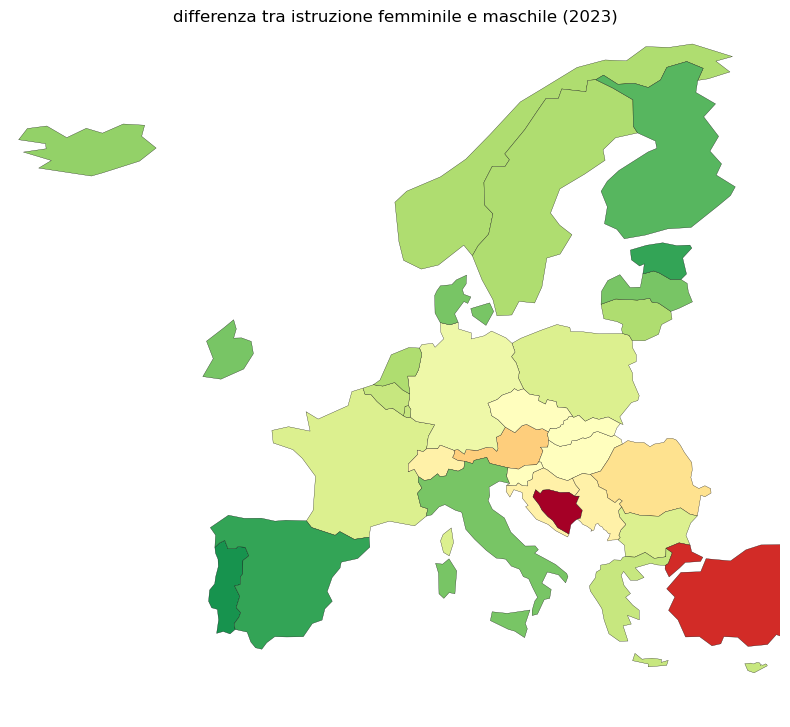

In [207]:
df_f_m_23 = europe.merge(df_f_m_23, how='left',
                         left_on='NAME', right_on='country')


# sistemo il layout
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# definisco i colori
cmap_f = cm.RdYlGn
min_rate, max_rate = -0.12, 0.1
norm = mcolors.Normalize(vmin=min_rate, vmax=max_rate)


# creao i grafici
df_f_m_23.plot(column='differenza', cmap=cmap_f, norm=norm, ax=ax, edgecolor='black', linewidth=0.2)


# custom axis
ax.set_xlim(-25, 35)
ax.set_ylim(32, 72)
ax.axis('off')
ax.set_title('differenza tra istruzione femminile e maschile (2023)')

# display the plot
plt.tight_layout()
plt.show()